# <center>Exponential Moving Average stocks, and 15 days experiment</center>

**Author:** João António - joaoantant@gmail.com \& github.com/JoaoAnt/.

**The ipybn can be found in:** the Github in the WaddlePortfolio/Projects.

# Degiro

Degiro is a Dutch brokerage company, where Europeans can participate and are also one of the
options with lesser values of commissions.

They have a commission of 0.50 e + USD 0.004/action for buying and the same value for
selling the action for American stocks.

I’m choosing America, because it is the minimum commission, and also because it is easy to
get data from.

If the stock is not from the EFT free pool, extra commissions take place, the NASDAQ is one of
those.

# Obtain Data
All the data is obtained in Alpha Vantage, to use it it is required a Key, that can be obtained free at
their site, one key for email. Every key can use five calls by the minute, and five hundred calls by
day.

To collect data is only required the tokens of the respective stock, various sites present an
extensive list.

# Exponential Moving Average
The Exponential Moving Average (EMA) is a type of technical analysis and is used in countless
technical indicators. In a Simple Moving Average, each value in the period carries equal weight,
and values outside of the period are not included in the average.

However, the Exponential Moving Average is a cumulative calculation, including all data. Past
values have a diminishing contribution to the average, while more recent values have a greater
contribution. This method allows the moving average to be more responsive to changes in the
data. Making the EMA method a very good indicator for long periods, for example, days or
months.

As for the mathematical description of the method:

$$EMA_{Today}=Value_{Today} \times \frac{Smoothing}{1+Days}+EMA_{Yesterday}\times(1-\frac{Smoothing}{1+Days})$$

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from alpha_vantage.timeseries import TimeSeries
from time import sleep
import csv
ts = TimeSeries(key=AlphaVantageKey,output_format='pandas')
counter=0;

## Functions

In [2]:
def Analyse(ticker, counter, action):
    counter+=1
    if counter % 5==0:
        sleep(60)
    df, meta_data = ts.get_daily(symbol=ticker,outputsize='full')
    df = df[['4. close']]
    df.reset_index(level=0, inplace=True)
    df.columns=['ds','y']
    exp1 = df.y.ewm(span=12, adjust=False).mean()
    exp2 = df.y.ewm(span=26, adjust=False).mean()
    if action=='buy':
        if exp1.iloc[-2]<exp2.iloc[-2]:
            if exp1.iloc[-1]>=exp2.iloc[-1]:
                print('Buy',ticker,'@',format((df['y'].iloc[-1]+df['y'].iloc[-2])/2,'.2f'))
    elif action=='sell':
        if exp1.iloc[-1]<=exp2.iloc[-1]:
            print('Sell',ticker,'@',format((df['y'].iloc[-1]+df['y'].iloc[-2])/2,'.2f'))
    print(ticker)    
    return (counter)

## To Sell

In [3]:
f = open('sell.csv', "r")
tickers = f.read().split("\n")
for i in range(0,(len(tickers)-1)):
    ticker = tickers[i]
    counter = Analyse(ticker, counter, 'sell')

ENT
PXS


## To Buy

In [4]:
if i < 1:
    f = open('buy.csv', "r")
    tickers = f.read().split("\n")
    for i in range(0,(len(tickers)-1)):
        ticker = tickers[i]
        counter = Analyse(ticker, counter, 'buy')

# Algorithm
* Obtain tokens, for NASDAQ, and analyze behaviour. (NASDAQ to minimize losses in commissions).
* Buy when the code says to do so. (Due to commissions many stocks of the same, instead of many different ones.)
* Sell when the code says to sell the action.

# Results and Experiment

In [21]:
print(money.head())

        Money  Day
Date              
22-07  134.38    2
23-07  134.54    2
24-07  132.78    2


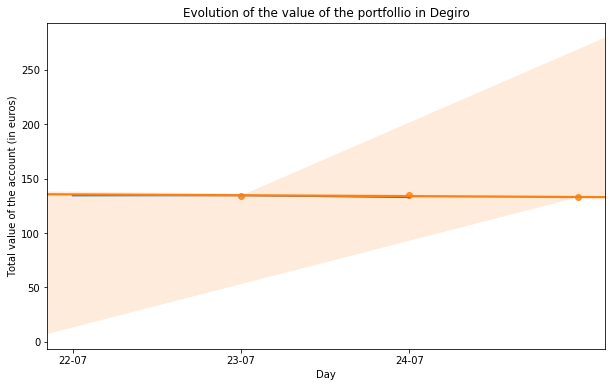

In [24]:
import seaborn as sns

money=pd.read_csv("Money.csv", index_col="Date",parse_dates=True)
plt.figure(figsize=(10,6))
sns.lineplot(data=money['Money'])
sns.regplot(x=money['Day'], y=money['Money'])

plt.ylabel("Total value of the account (in euros)")
plt.title("Evolution of the value of the portfollio in Degiro")

plt.show()

In [6]:
money.describe()

,Money
count,3.000000
mean,133.900000
std,0.973242
min,132.780000
25%,133.580000
50%,134.380000
75%,134.460000
max,134.540000
